<div id="container" style="position:relative;">
<div style="float:left"><h1> Statistics & Public Health 1: Cleaning and EDA </h1></div>
</div>
</div>

## Introduction

We have been provided with the mosquito tracking data from 2008 to 2019 for the city of Chicago. The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. 

**West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.**

They are then able to study the captured specimens and monitor the state of WNV spread in the city.

Here is the basic picture of the data we have been provided and we will try to clean the data and perform basic analysis to understand the data.

#### Details about the data

| Column | Description | Notes |
| --- | --- | --- |
| Year | Year that the WNV test is performed |  |
| Week | Week that the WNV test is performed |  |
| Address Block | Address of the location of trap |  |
| Block| Block number of address |  |
| Trap | Id of the trap | Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite |
| Trap type | Type of trap |  |
| Date | Date and time that the WNV test is performed | Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.  |
| Mosquito number | Number of mosquitoes caught in this trap | These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50. |
| WNV Present | Whether West Nile Virus was present in these mosquitos |  |
| Species | Mosquito species |  |
| Lat | Latitude of trap |  |
| Lon | Longitude of trap |  |

## Table of contents

1. [Basic Data Wrangling](#data_cleaning)<br>
    1.1  [Checking the shape of dataframe.](#1_1)<br>
    1.2  [Changing the data types.](#1_2)<br>
    1.3  [Understanding numerical and categorical data.](#1_3)<br>
    1.4  [Checking duplicates and removing duplicate values.](#1_4)<br>
    1.5  [Checking null values and imputing them.](#1_5)<br>
2. [Basic EDA](#basic_EDA)<br>
    2.1  [Visualization to explore the relationship between mosquito number and date.](#2_1)<br>
    2.2  [Observations.](#2_2)<br>
3. [Advanced EDA](#advanced_EDA)<br>
    3.1  [Visualization to explore the relationship between mosquito species and WNV prevalence.](#3_1)<br>
    3.1.1 [Observations.](#3_1.1)<br>
    3.2  [Visualization to explore relationship between the number of mosquitos caught and trap type.](#3_2)<br>
    3.2.1 [Observations.](#3_2.1)<br>
    3.3  [Visualization to see which species are more dominant at each address block.](#3_3)<br>
    3.3.1 [Observations.](#3_3.1)<br>


### Basic Data Wrangling

<a id="data_cleaning"></a>

In [2]:
#Let us import all the libraries that we will need to perform data wrangling and EDA on our data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Let us load the csv data file
wnv= pd.read_csv('data/mosquito_data.csv')

#Reading the top five rows
wnv.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [4]:
#seeing random ten rows to better look at data
wnv.sample(10)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
15350,2007,25,41XX N OAK PARK AVE,41,T002,GRAVID,2007-07-02 02:07:45,2,Res,negative,CULEX RESTUANS,41.956299,-87.797517
16064,2013,29,100XX W OHARE AIRPORT,100,T905,GRAVID,2013-07-19 00:07:00,47,Res,positive,CULEX RESTUANS,NaN,NaN
6036,2014,32,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2014-08-07 00:08:00,2,Pip,negative,CULEX PIPIENS,41.953664,-87.724987
8395,2012,34,6XX W MONTROSE DR,6,T017,GRAVID,2012-08-23 00:08:00,2,Pip,negative,CULEX PIPIENS,41.962015,-87.646848
7778,2013,28,17XX N ASHLAND AVE,17,T232,GRAVID,2013-07-12 00:07:00,4,Res,negative,CULEX RESTUANS,41.913052,-87.667905
4883,2015,27,22XX W 51ST ST,22,T061,GRAVID,2015-07-09 00:07:00,47,Res,negative,CULEX RESTUANS,41.801048,-87.680425
17291,2013,36,71XX N HARLEM AVE,71,T233,GRAVID,2013-09-06 00:09:00,18,Pip,positive,CULEX PIPIENS,42.010649,-87.806789
7597,2013,30,46XX N MILWAUKEE AVE,46,T003,GRAVID,2013-07-25 00:07:00,16,Res,negative,CULEX RESTUANS,41.965375,-87.758412
5446,2014,37,131XX S BRANDON AVE,131,T209,GRAVID,2014-09-11 00:09:00,10,Pip,negative,CULEX PIPIENS,41.657069,-87.546049
9836,2011,29,127XX S DOTY AVE,127,T115,GRAVID,2011-07-25 00:07:00,1,Pip,negative,CULEX PIPIENS,41.662387,-87.590180


### Checking the shape of dataframe.

<a id="1_1"></a>

In [5]:
#to see the shape of DataFrame

wnv.shape

(18495, 13)

In [6]:
#to get a overview of the data
wnv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


#### Observations:

- We have a total of 18495 records with 13 rows.
- We can see that there are three data types in our data: float, int and object i.e. string.
- We can see that Lat and Lon columns have some null values and both have equal number of null values. From the sample data we can see that for both Lat and Lon have NAN at the same time.
- The Date column has an object data type.

### Changing the data types

<a id="1_2"></a>

Firstly, let us convert the data type for Date column to date time format.

In [7]:
wnv['Date'] = pd.to_datetime(wnv['Date'])

In [8]:
#to check the datatypes
wnv.dtypes

Year                        int64
Week                        int64
Address Block              object
Block                       int64
Trap                       object
Trap type                  object
Date               datetime64[ns]
Mosquito number             int64
Mosquito ID                object
WNV Present                object
Species                    object
Lat                       float64
Lon                       float64
dtype: object

### Understanding numerical and categorical data

<a id="1_3"></a>

We will now look at the data columns that have numeric and categorical data and we will try to understand how this the data distributed.

In [9]:
#saving numeric data in separate dataframe.
numerical_data=wnv.select_dtypes(['float', 'int'])
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Block            18495 non-null  int64  
 3   Mosquito number  18495 non-null  int64  
 4   Lat              15571 non-null  float64
 5   Lon              15571 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 867.1 KB


In [10]:
print(numerical_data.columns)

Index(['Year', 'Week', 'Block', 'Mosquito number', 'Lat', 'Lon'], dtype='object')


In [11]:
#We will be looking at random 10 records of numeric data columns
numerical_data.loc[:,['Year','Week', 'Block', 'Mosquito number','Lat', 'Lon']].sample(10)

,Year,Week,Block,Mosquito number,Lat,Lon
300,2019,33,100,3,NaN,NaN
13151,2008,32,46,1,41.965375,-87.758412
39,2019,39,36,2,41.945961,-87.832942
12644,2009,22,52,1,41.798211,-87.736925
7853,2013,27,28,4,41.932790,-87.700238
8879,2012,28,109,5,41.695494,-87.609082
9004,2012,27,131,4,41.657069,-87.546049
8068,2013,23,100,29,NaN,NaN
11676,2009,38,37,1,41.825398,-87.723962
15827,2015,34,71,5,42.010645,-87.806790


We are creating a function to plot a histogram for central tendencies so that we can call it any time. We will plot histogram to see the distribution of Week and Mosquito Number columns

In [12]:
def histogram_chart_helper(column):
    plt.hist(wnv[column], bins= 5, color='grey')
    plt.axvline(wnv[column].mean(),label = "mean",color = "red")
    plt.axvline(wnv[column].median(),label = "median",color = "blue")
    plt.axvline(wnv[column].mode()[0],label = "mode",color = "black")
    plt.xlabel(column)
    plt.ylabel('Frequency of occurence')
    plt.legend()
    plt.title(f"Column: {column}")

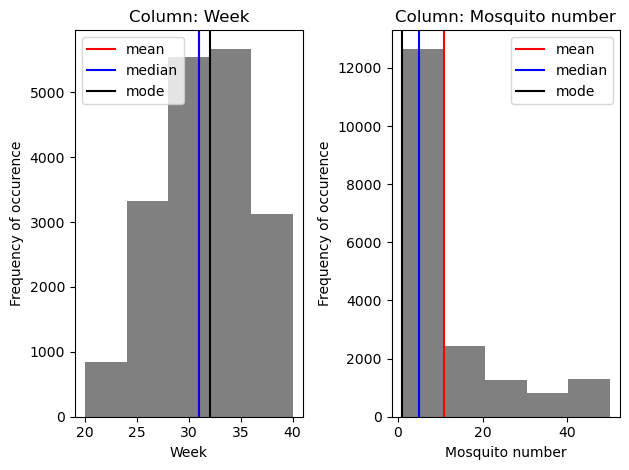

In [13]:
plt.subplots(1,2)

plt.subplot(1, 2, 1)
histogram_chart_helper('Week')

plt.subplot(1, 2, 2)
histogram_chart_helper('Mosquito number')

plt.tight_layout()

- The week distribution can be assumed as a normal distribution as we see the histogram resembles the bell shape. 
- The histogram for mosquito number is right skewed which means data for mosquito number has large values in the range 0-10. It may be because the data was capped at 50 and a data was split for number exceeding 50.

In [14]:
#saving categorical data in separate dataframe
categorical_data=wnv.select_dtypes('object')
print(categorical_data.columns)

Index(['Address Block', 'Trap', 'Trap type', 'Mosquito ID', 'WNV Present',
       'Species'],
      dtype='object')


We are creating a function to plot a bar chart so that we can call it any time. We will plot bar chart to see the distribution of Trap and Trap type.

In [15]:
def bar_chart_helper(column, fig_width = 10,fig_height = 10):
    plt.figure(figsize= (fig_width,fig_height))
    plt.bar
    wnv[column].value_counts().sort_values().plot(kind = "barh")
    plt.title(f"Column: {column}")
    plt.show()

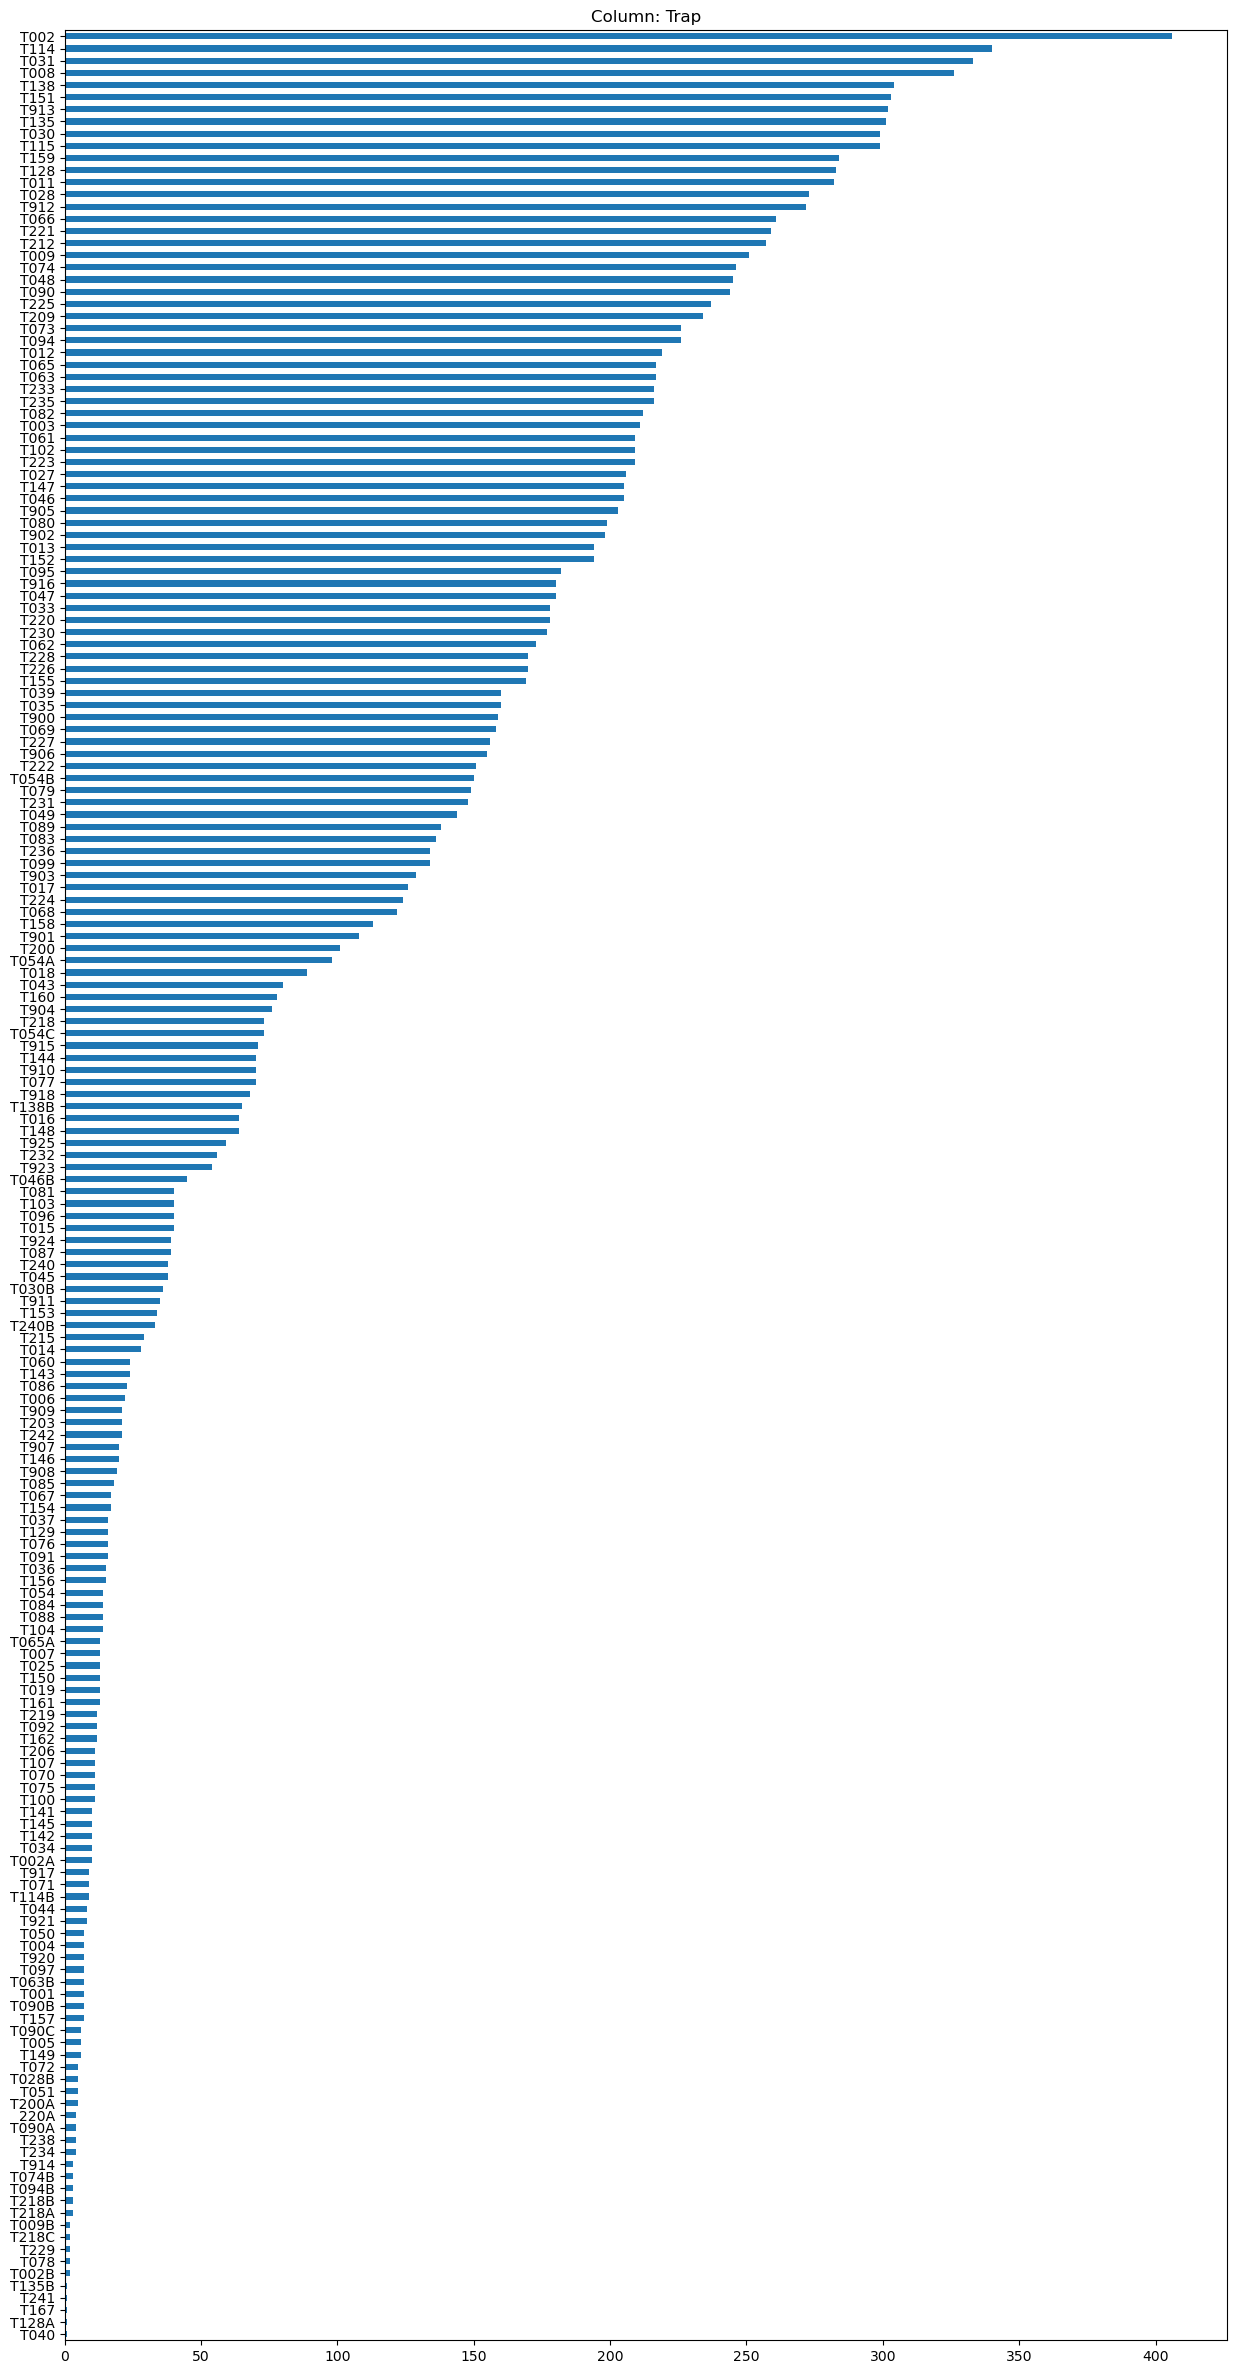

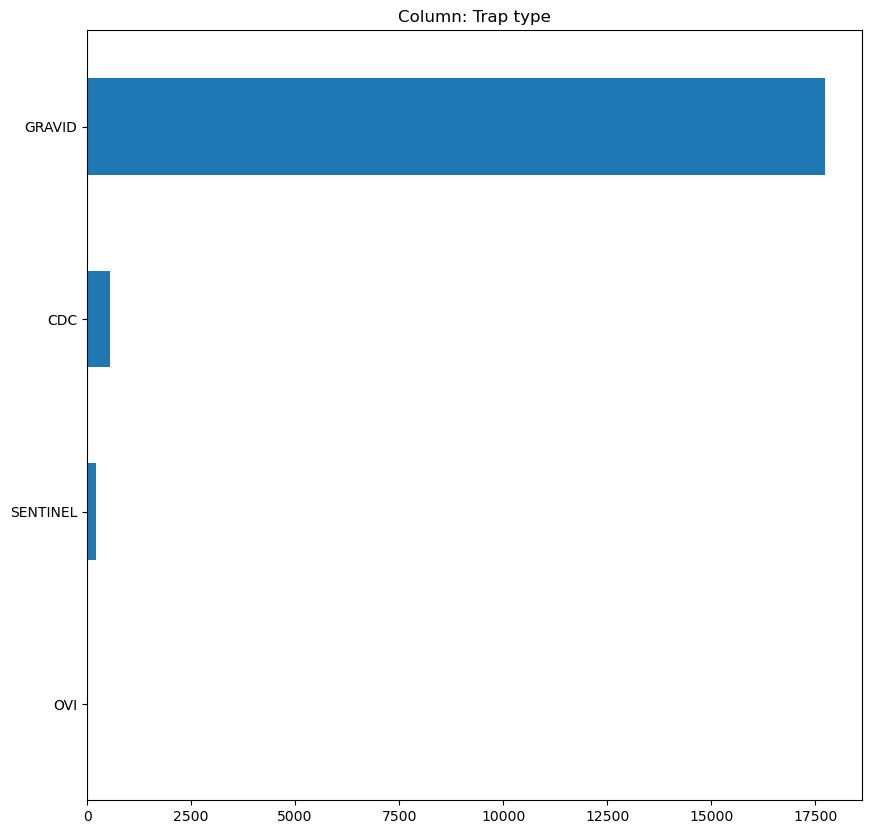

In [16]:
bar_chart_helper('Trap', fig_width = 15,fig_height = 30 )
bar_chart_helper('Trap type')

T002 was installed at multiple locations and that is why it is at the top. The trap Gravid is the most common while OVI is least preferred.

In [17]:
categorical_data[categorical_data['Trap']=="T002"]['Address Block'].count()

406

In [18]:
categorical_data[categorical_data['Trap']=="T002"][['Address Block']].sample(5)

,Address Block
16476,41XX N OAK PARK AVE
5679,41XX N OAK PARK AVE
268,41XX N OAK PARK AVE
17276,41XX N OAK PARK AVE
7284,41XX N OAK PARK AVE


T002 has been used in 406 records for location 41XX OAK Park Avenues.

### Checking duplicates and removing duplicate values

<a id="1_4"></a>

Let us check if there are any duplicate rows and columns. We will try to check if there are true duplicates across rows and columns.

In [ ]:
#checking duplicates across rows.

In [19]:
wnv.duplicated().sum()

658

In [20]:
#What is the percentage of duplicate rows.
(wnv.duplicated().sum()/wnv.shape[0])*100

3.5577183022438494

The percentage of duplicates is 3.5 % so we need to check what all rows are true duplicates so that we can delete them.

In [21]:
#We are taking look at all the rows that have duplicates along with the duplicated rows.
wnv[wnv.duplicated(keep=False)].sort_values(by =['Trap type', 'Address Block', 'Trap'])

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
10744,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN
15849,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN
17477,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN
18120,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN
18161,2010,33,100XX W OHARE AIRPORT,100,T908,CDC,2010-08-20 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16781,2012,33,81XX S ASHLAND,81,T068,GRAVID,2012-08-17 00:08:00,5,Res,positive,CULEX RESTUANS,NaN,NaN
17090,2012,33,81XX S ASHLAND,81,T068,GRAVID,2012-08-17 00:08:00,5,Res,positive,CULEX RESTUANS,NaN,NaN
17410,2012,33,81XX S ASHLAND,81,T068,GRAVID,2012-08-17 00:08:00,5,Res,positive,CULEX RESTUANS,NaN,NaN
17544,2007,32,81XX S ASHLAND,81,T068,GRAVID,2007-08-15 00:08:00,25,Pip,positive,CULEX PIPIENS,NaN,NaN


I want to check how many rows we have with mosquito number equal to 50, because we have been informed that the rows with mosquito numbers exceeding 50 have been split into another row in order to maintain the cap at 50

In [22]:
ddd=wnv[wnv.duplicated(keep=False)].sort_values(by =['Trap type', 'Address Block', 'Trap'])

In [24]:
ddd[ddd['Mosquito number']==50]

#We will get all the duplicate rows with mosquito number =50

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
14255,2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
16648,2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
17409,2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
17817,2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
18289,2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17442,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
17605,2007,31,115XX S AVENUE L,115,T103,GRAVID,2007-08-08 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
3583,2016,32,4XX W 127TH,4,T135,GRAVID,2016-08-11 00:08:00,50,Res,positive,CULEX RESTUANS,NaN,NaN
17458,2016,32,4XX W 127TH,4,T135,GRAVID,2016-08-11 00:08:00,50,Res,positive,CULEX RESTUANS,NaN,NaN


In [25]:
ddd[ddd['Mosquito number']==50].duplicated().sum()

76

Out of 100 duplicate rows we have 76 number of duplicates rows with moisquito number equals 50. 

In [26]:
print(f"We have {round((76/wnv.shape[0])*100,3)} % of true duplicated rows with mosquito number equals 50")

We have 0.411 % of true duplicated rows with mosquito number equals 50


We can proceed with deleting all the tru duplicate rows.

In [27]:
wnv.drop_duplicates(inplace=True)

In [28]:
#Cross checking if we have any duplicate rows left after dropping them
wnv.duplicated().sum()

0

Let us check of there are columns that are true duplicates.

In [29]:
wnv.T.duplicated().sum()

0

There isn't any true duplicate column but we see that the Addres block has the block number but it is appended by XX and we also have a separate column for the block number. 
Let us first see if there is any address block that missing the block number data.

In [30]:
wnv['Address Block'].sample(10)

5799        1XX N CENTRAL PARK DR
4137             50XX S UNION AVE
9028            52XX S KOLMAR AVE
18360    101XX S STONY ISLAND AVE
12924                 4XX W 127TH
10833           37XX S PULASKI RD
2863              37XX E 118TH ST
4867               3XX W 104TH ST
5561             25XX W GRAND AVE
2560         28XX N FRANCISCO AVE
Name: Address Block, dtype: object

In [31]:
#First we are removing the wrong block stringfrom the address and then readding the block number to the address block.
wnv['Address Block']= (wnv['Address Block'].str.split(' ').str[1:]).str.join(' ')

In [32]:
wnv['Address Block']=wnv['Block'].astype(str)+ " "+wnv['Address Block']

In [33]:
wnv.head(2)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100 W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52 S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925


###  Checking null values and imputing them.
<a id="#1_5"></a>

There are some null values in the latitude and longitude columns. We know that latitude and longitude are associated with the address block. We can take a look at:
- How many null values do we have?
- Which is the most common address block in our data?
- Which are the address blocks that are missing the latitude and longitude data?


In [34]:
wnv.shape

(17837, 13)

In [35]:
#to check null values
wnv.isnull().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

We have 2266 null values in the latitude and longitude columns.

In [36]:
# checking the random 20 rows with missing latitude values.
wnv[wnv['Lat'].isnull()].sample(20)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
5811,2014,34,4 W 127TH,4,T135,GRAVID,2014-08-21 00:08:00,2,Ter,negative,CULEX TERRITANS,NaN,NaN
10069,2011,26,100 W OHARE AIRPORT,100,T916,GRAVID,2011-06-30 00:06:00,50,Res,negative,CULEX RESTUANS,NaN,NaN
8363,2012,34,100 W OHARE AIRPORT,100,T905,GRAVID,2012-08-24 00:08:00,18,Res,positive,CULEX RESTUANS,NaN,NaN
10364,2010,37,100 W OHARE AIRPORT,100,T913,GRAVID,2010-09-17 00:09:00,7,Res,negative,CULEX RESTUANS,NaN,NaN
8264,2012,36,100 W OHARE AIRPORT,100,T905,GRAVID,2012-09-10 00:09:00,1,Res,negative,CULEX RESTUANS,NaN,NaN
2792,2017,28,100 W OHARE AIRPORT,100,T913,GRAVID,2017-07-14 00:07:00,24,Res,negative,CULEX RESTUANS,NaN,NaN
2207,2017,38,100 W OHARE AIRPORT,100,T905,GRAVID,2017-09-21 00:09:00,1,Res,negative,CULEX RESTUANS,NaN,NaN
9427,2011,35,100 W OHARE AIRPORT,100,T916,GRAVID,2011-09-02 00:09:00,3,Res,negative,CULEX RESTUANS,NaN,NaN
8911,2012,28,100 W OHARE,100,T904,GRAVID,2012-07-13 00:07:00,3,Res,negative,CULEX RESTUANS,NaN,NaN
11737,2009,37,100 W OHARE AIRPORT,100,T905,GRAVID,2009-09-17 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN


We see that few address block show up multiple times. So let us filter all the null values and see what all addresses appear more often and how many null records do we have for them.

In [77]:
wnv[wnv['Lat'].isnull()].groupby('Address Block').count()['Year']

Address Block
100 W OHARE             178
100 W OHARE AIRPORT    1499
115 S AVENUE L           32
30 S HOYNE               12
4 W 127TH               264
43 N ASHLAND             10
65 N OAK PARK AVE        17
79 S CHICAGO            127
81 S ASHLAND            116
98 S AVENUE G            11
Name: Year, dtype: int64

100 W OHARE AIRPORT has the maximum number of null values. If we plot all the address blocks in bar chart and see which address appears most often in the data.

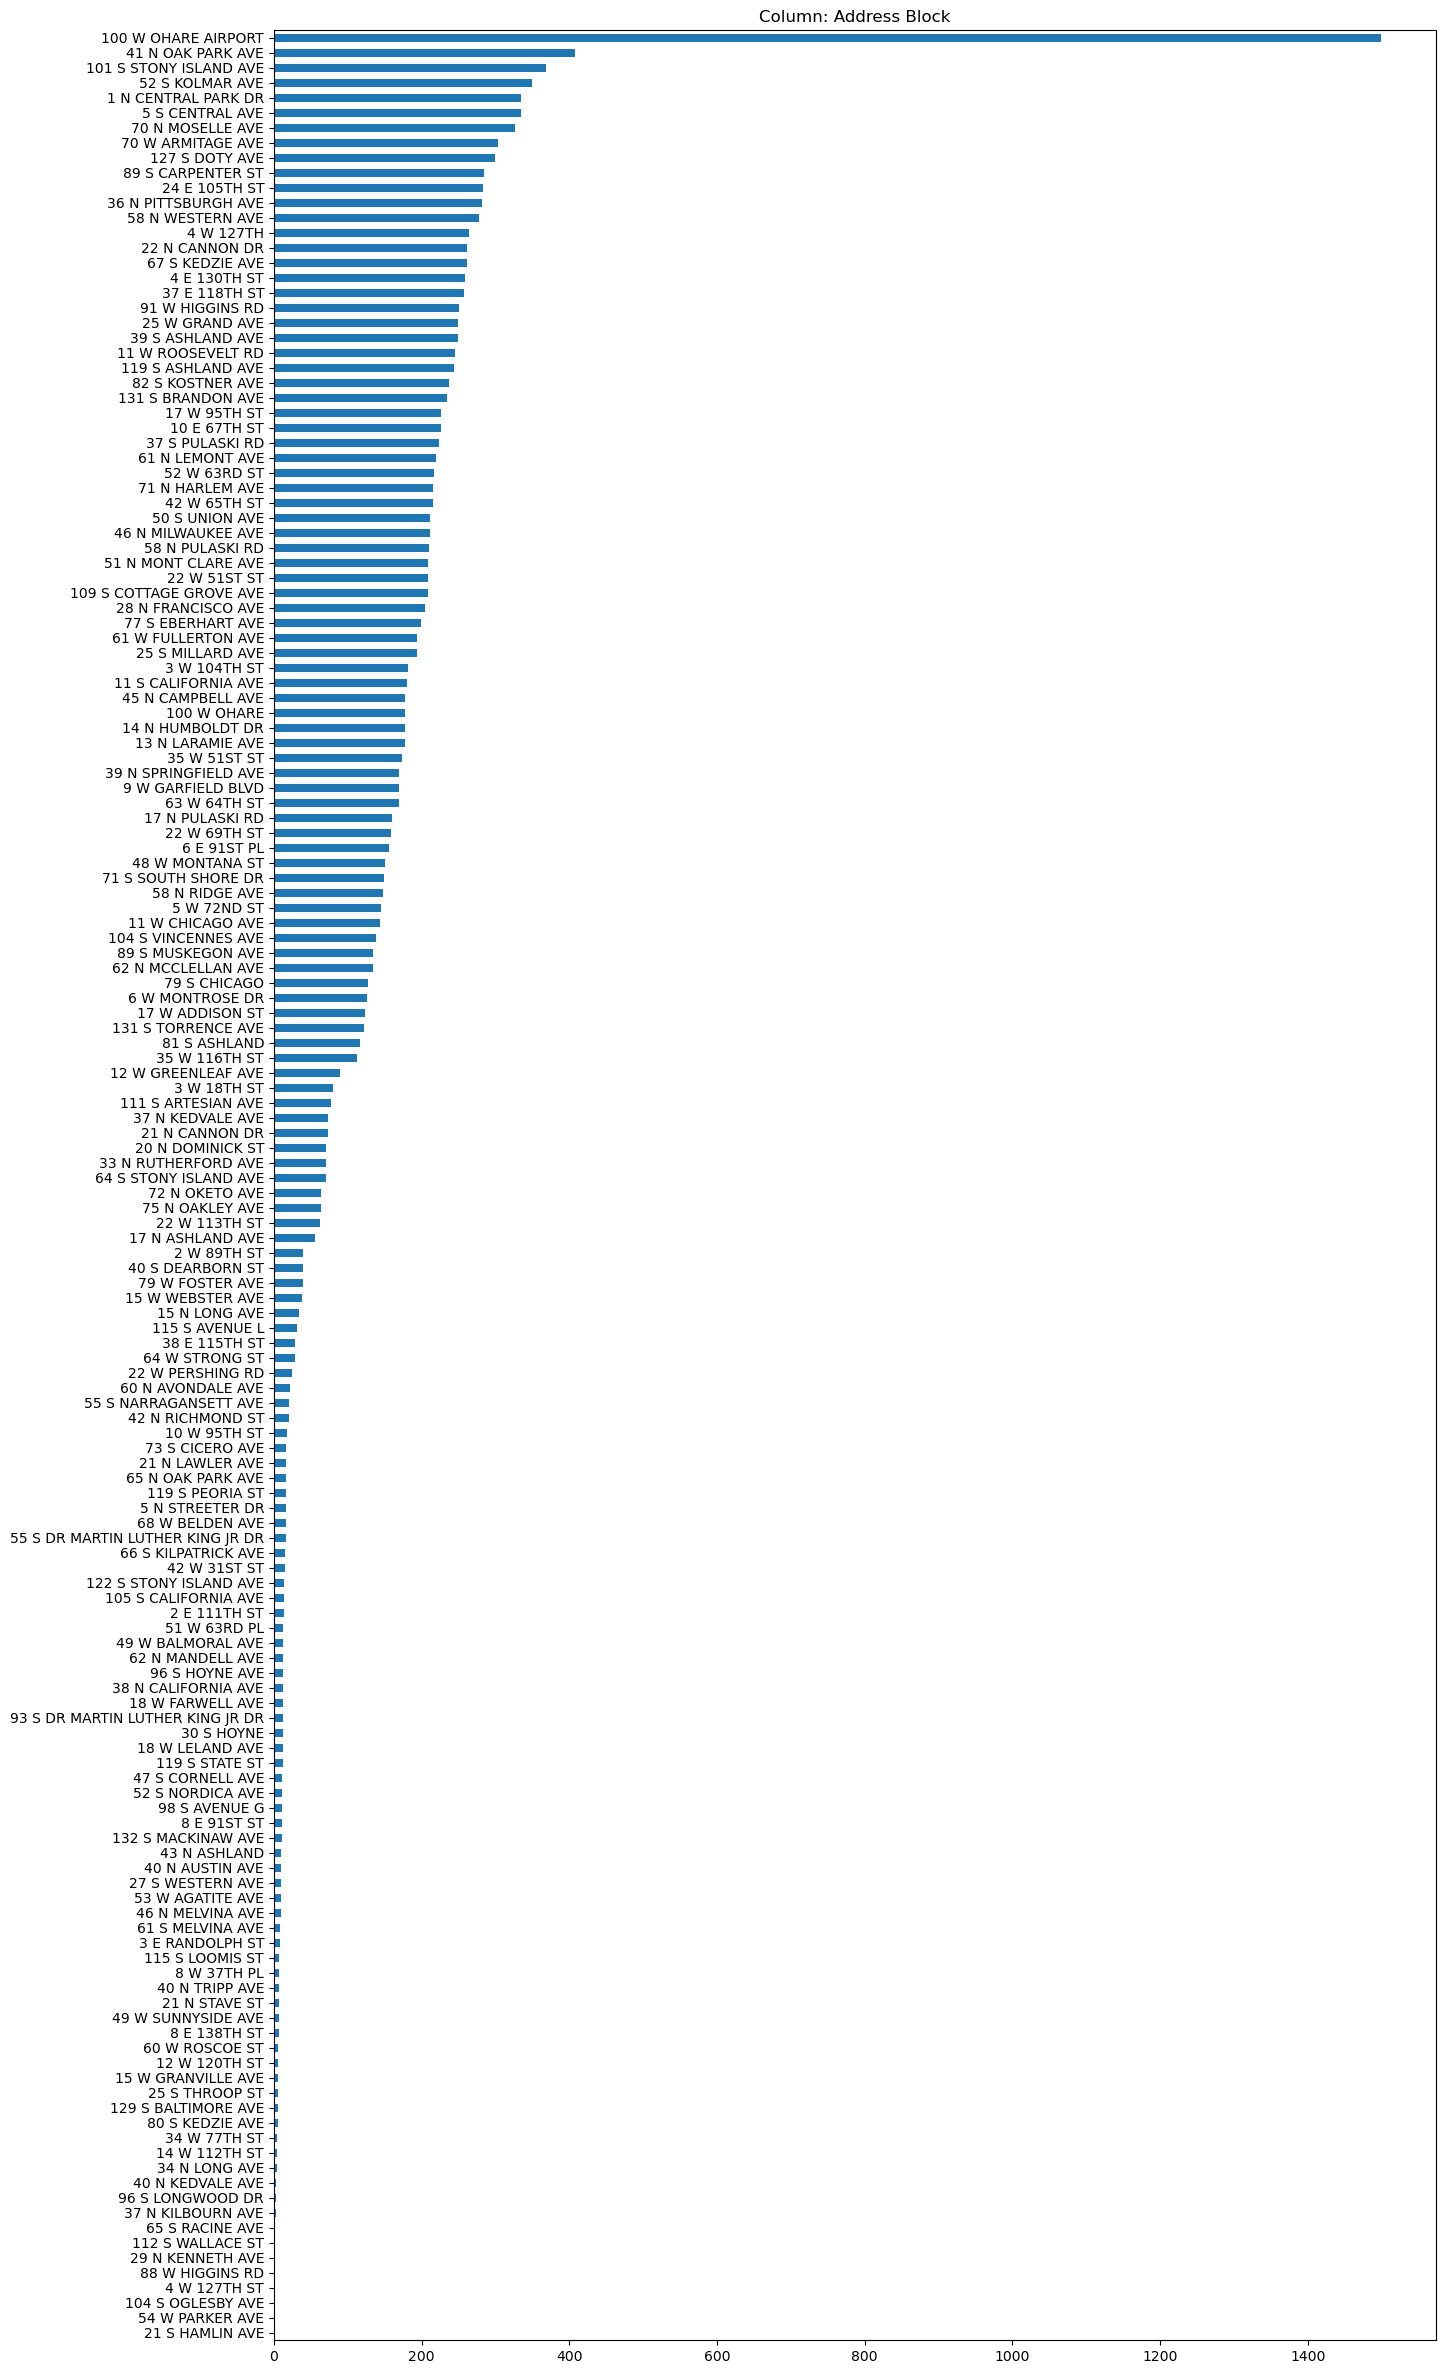

In [78]:
bar_chart_helper('Address Block', fig_width = 15,fig_height = 30 )

Clearly, large number of records are from W Ohare Airport but we have the missing latitude and longitude values. 

We can impute all the missing latitude and longitude values with the latitude and longitude of W Ohare Aiprort as it is the most commom value in our data set. The other locations that have null values are very less.
I feel that latitude and longitude here in our data set behave more like categorical data as they are associated with a categorical column. Therefore, I am not proceeding with imputing them using central limit theorem (mean, median, or mode values).

I looked up in google for Latitude and Longitude points for 100 W Ohare Airport (41° 58' 42.9996'' N and 87° 54' 17.0064'' W) i.e (41.978611, and  -87.904724). I am  using the same value to fill the missing latitudes and longitudes.


In [79]:
wnv['Lat'] = wnv['Lat'].fillna(41.978611)

In [80]:
wnv['Lon'] = wnv['Lon'].fillna(-87.904724)

In [81]:
wnv.isnull().sum()

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

Now that we have cleaned the data. Let us create some visulatization to better understand the relationship between different columns.

### Basic EDA

<a id="basic_EDA"></a>

### Visualization to explore the relationship between mosquito number and date

<a id="2_1"></a>

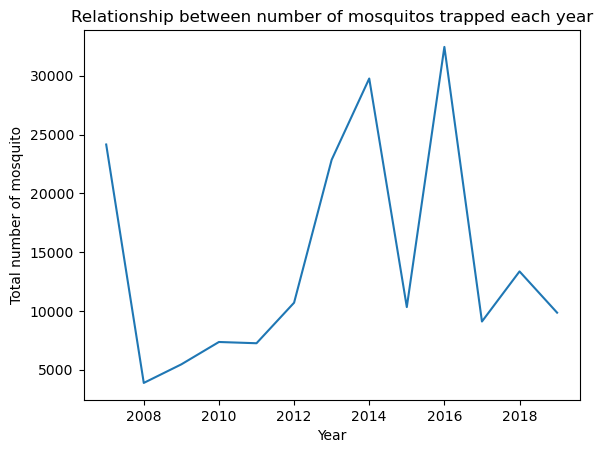

In [83]:
#Visualization to show relationship between mosquitos trapped per year
plt.figure()
plt.plot(wnv.groupby(['Year']).sum()['Mosquito number'].index, wnv.groupby(['Year']).sum()['Mosquito number'].values)
plt.xlabel('Year')
plt.ylabel('Total number of mosquito')
plt.title('Relationship between number of mosquitos trapped each year')
plt.show()

In [ ]:
#Visualization to show relationship between mosquitos trapped per year per week

In [142]:
wnv.groupby(['Year', 'Week']).sum()['Mosquito number'].unstack(level=0, fill_value=0).head()

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Week,,,,,,,,,,,,,
20,0,0,86,0,9,0,0,0,0,0,0,0,0
21,30,0,370,0,3,0,0,0,0,0,0,0,0
22,99,0,124,45,115,0,0,0,250,0,0,0,0
23,61,102,820,82,215,141,237,625,510,113,334,864,851
24,147,150,389,443,546,225,979,1163,813,828,412,984,1604


<AxesSubplot:title={'center':'Total mosquitoes trapped each year broken down by week number'}, xlabel='Week', ylabel='Total number of Mosquitos trapped'>

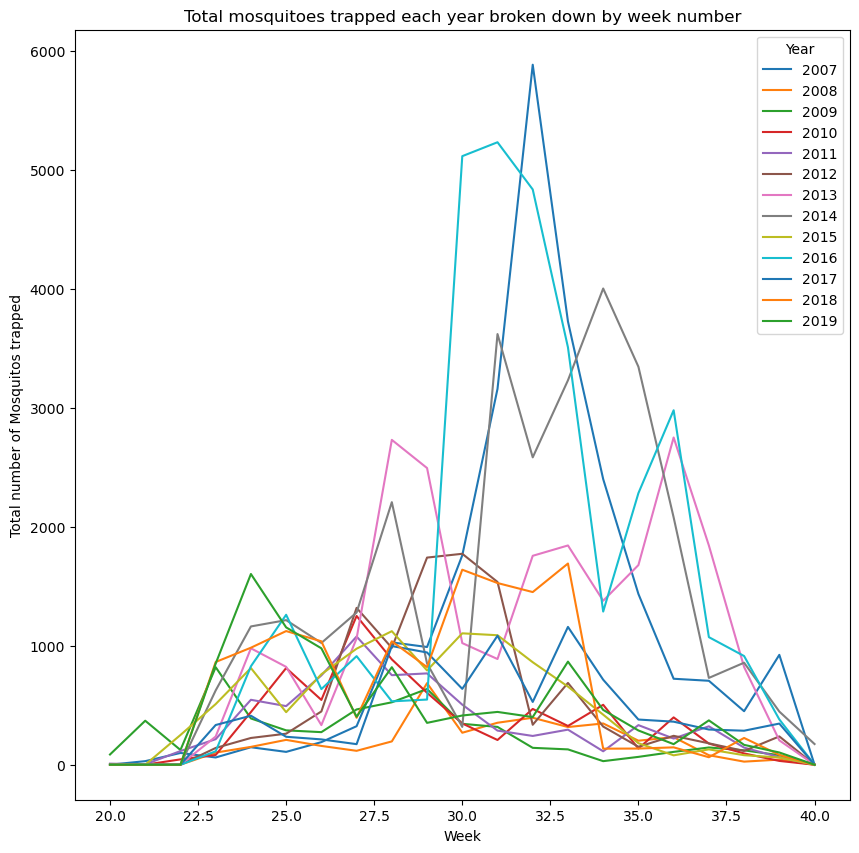

In [38]:
#plotting line chart for mosquito density week wise for each year
wnv.groupby(['Year', 'Week']).sum()['Mosquito number'].unstack(level=0, fill_value=0).plot(figsize=(10,10), title='Total mosquitoes trapped each year broken down by week number', ylabel='Total number of Mosquitos trapped')

In [49]:

wnv.groupby(['Year','Week', 'Date']).sum()['Mosquito number'].unstack(level=0, fill_value=0).head()

Year                      2007  2008  2009  2010  2011  2012  2013  2014  \
Week Date                                                                  
20   2009-05-28 00:05:00     0     0    86     0     0     0     0     0   
     2011-06-10 00:06:00     0     0     0     0     1     0     0     0   
     2011-06-17 00:06:00     0     0     0     0     8     0     0     0   
21   2007-05-29 00:05:00    30     0     0     0     0     0     0     0   
     2009-06-02 00:06:00     0     0   287     0     0     0     0     0   

Year                      2015  2016  2017  2018  2019  
Week Date                                               
20   2009-05-28 00:05:00     0     0     0     0     0  
     2011-06-10 00:06:00     0     0     0     0     0  
     2011-06-17 00:06:00     0     0     0     0     0  
21   2007-05-29 00:05:00     0     0     0     0     0  
     2009-06-02 00:06:00     0     0     0     0     0

<AxesSubplot:title={'center':'Total mosquitoes trapped each year broken down by week-date'}, xlabel='Week,Date', ylabel='Total number of Mosquitos trapped'>

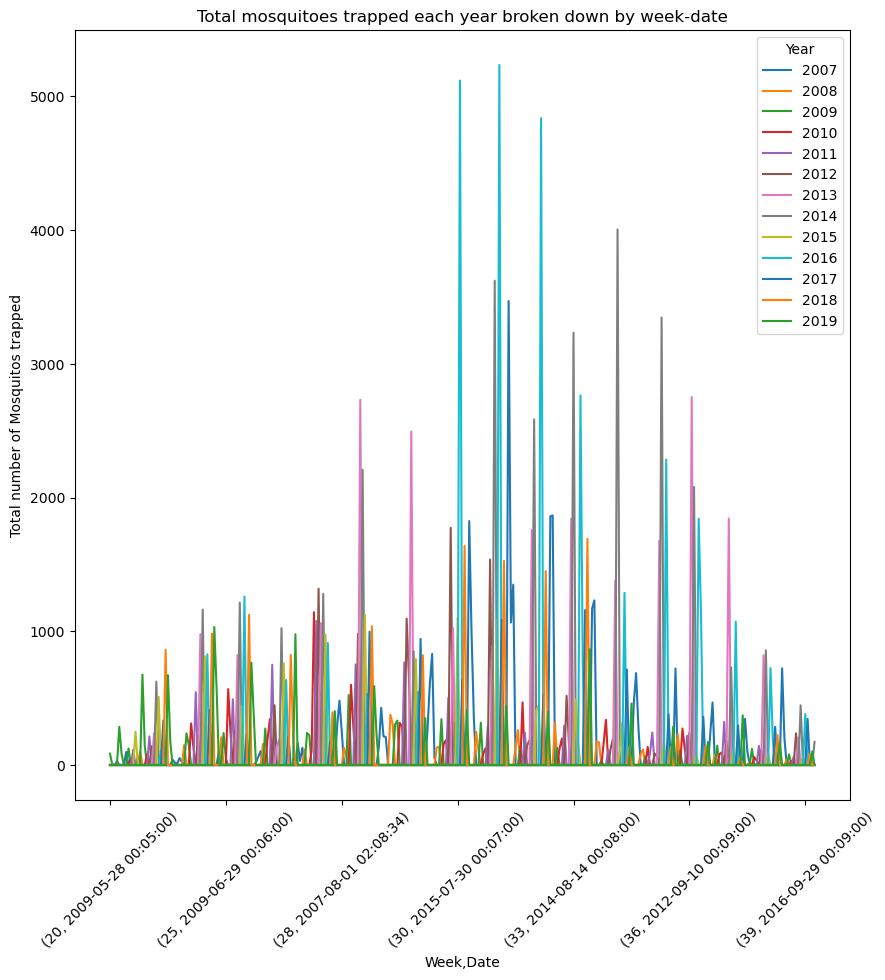

In [44]:
#plotting line chart for mosquito density such that date are grouped week wise and are year of the date is highlighted by the color
wnv.groupby(['Year','Week', 'Date']).sum()['Mosquito number'].unstack(level=0, fill_value=1).plot(figsize=(10,10), title='Total mosquitoes trapped each year broken down by week-date', ylabel='Total number of Mosquitos trapped', rot=45)

#### Observations:

<a id="2_2"></a>

- From the plot of the number of mosquitoes trapped each year, we see that the number of mosquitoes trapped was less between 2008-2011. It then spiked between 2012-2013 and then dropped again. It spiked again between 2015-2017.
 - It could be said that between 2008-2011 the mosquito population reduced.
 - It might be that more satellite traps were installed after 2011 so that more data can be collected. Spikes in the data are maybe because of a sudden increase in the mosquito population.
- When we go a step deeper into the weak level, week 29-35 has more mosquito data in general. These weeks fall under the peak summer months of July and August and therefore the mosquito population increases during these weeks.
- When we go to the date level we see that the maximum number of mosquitoes recorded was on a particular day for the year 2016- week 29

### Advanced EDA

<a id="advanced_EDA"></a>

### Visualization to explore the relationship between mosquito species and WNV prevalence

<a id="3_1"></a>

<Figure size 640x480 with 0 Axes>

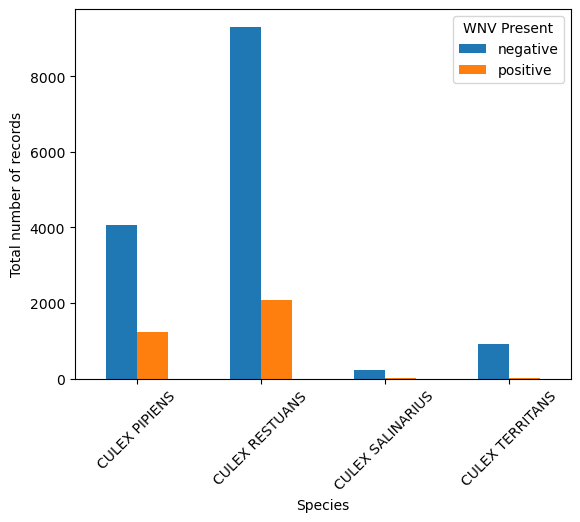

In [61]:
# We are plotting a side by side bar chart to see which species of mosquitoes had WNV prevalence
plt.figure()
agg_df = wnv.groupby(['Species', 'WNV Present'])['Species'].count()
agg_df.unstack().plot(kind = 'bar',ylabel='Total number of records')

plt.xticks(rotation = 45)

plt.show()

#### Observations:

<a id="3_1.1"></a>

Of all the mosquitoes that were tested, Culex Restuans is the most common species and has the highest percentage of WNV positive cases. The second common species is Culex Pipiens and it has the second most wnv positive cases.

### Visualization to explore relationship between the number of mosquitoes caught and trap type

<a id="3_2"></a>

In [65]:
#checking the mean of mosquito density for each trap type.
new_df= wnv.groupby(['Trap type']).mean()[['Mosquito number']]
new_df

,Mosquito number
Trap type,
CDC,17.984877
GRAVID,10.054100
OVI,1.000000
SENTINEL,24.564593


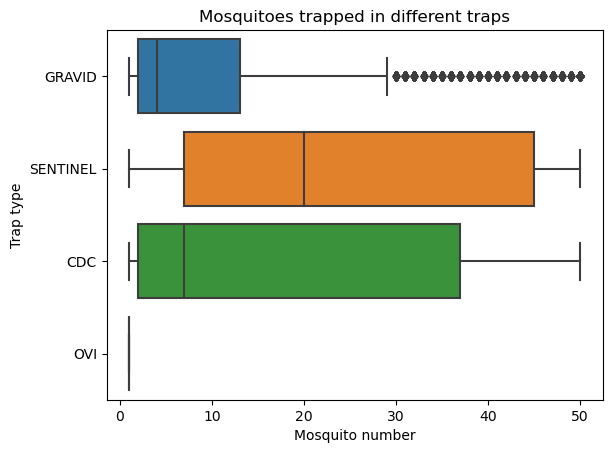

In [157]:
# plotting the number of mosquitos trapped and trap type

for col in new_df.columns:
    
    sns.boxplot(x=col,y='Trap type',data=wnv)
    plt.title(f"Mosquitoes trapped in different traps")
    plt.show()

#### Observations:

<a id="3_2.1"></a>

We plotted the box plot to depict the distributions of the mosquito number across different trap types. 
- for trap type Gravid
     - The data is skewed which means we have a large number of records that have few mosquitoes trapped in the range of 0-10. The number of mosquitos in the range of 30-50 is the outlier. Maybe Gravid is installed in locations where the mosquito density is less.
- for trap type Sentinel
    - It seems that the Sentinel was installed in many locations as the boxplot looks a little symmetrical and data is dispersed. There aren't any outliers. And most of the data lies within 25 to 75 % of the data set. We can also say that Senital is performing well or it was installed in locations with the highest mosquito density.
- for CDC
    - the data is dispersed and there are no outliers. The median line is towards the left so we have more data where the number of mosquitoes trapped is approx 7-10. It is likely that there are more CDC traps as compared to Gravid.
- for OVI
    - We don't have many records for the OVI. We likely have a very limited number of OVI traps installed.

        

### Visualization to see which species are more dominant at each address block

<a id="3_3"></a>

We will be plotting the stacked bar chart to see the species that are available at each location.

In [59]:
# We are grouping by species and address block to see the species at each location
# We will be sorting the values in decending order for the species CULEX RESTUANS as it is the dominant species.
wnv.groupby([ 'Address Block', 'Species'])['Address Block'].count().unstack().sort_values(by = 'CULEX RESTUANS', ascending=False )


Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
Address Block,,,,
100 W OHARE AIRPORT,420.0,1005.0,40.0,34.0
41 N OAK PARK AVE,142.0,258.0,3.0,5.0
1 N CENTRAL PARK DR,80.0,240.0,3.0,12.0
101 S STONY ISLAND AVE,117.0,234.0,4.0,14.0
52 S KOLMAR AVE,93.0,232.0,NaN,24.0
...,...,...,...,...
25 S THROOP ST,5.0,NaN,NaN,NaN
40 N TRIPP AVE,6.0,NaN,NaN,1.0
60 W ROSCOE ST,5.0,NaN,NaN,1.0


<Figure size 3000x30000 with 0 Axes>

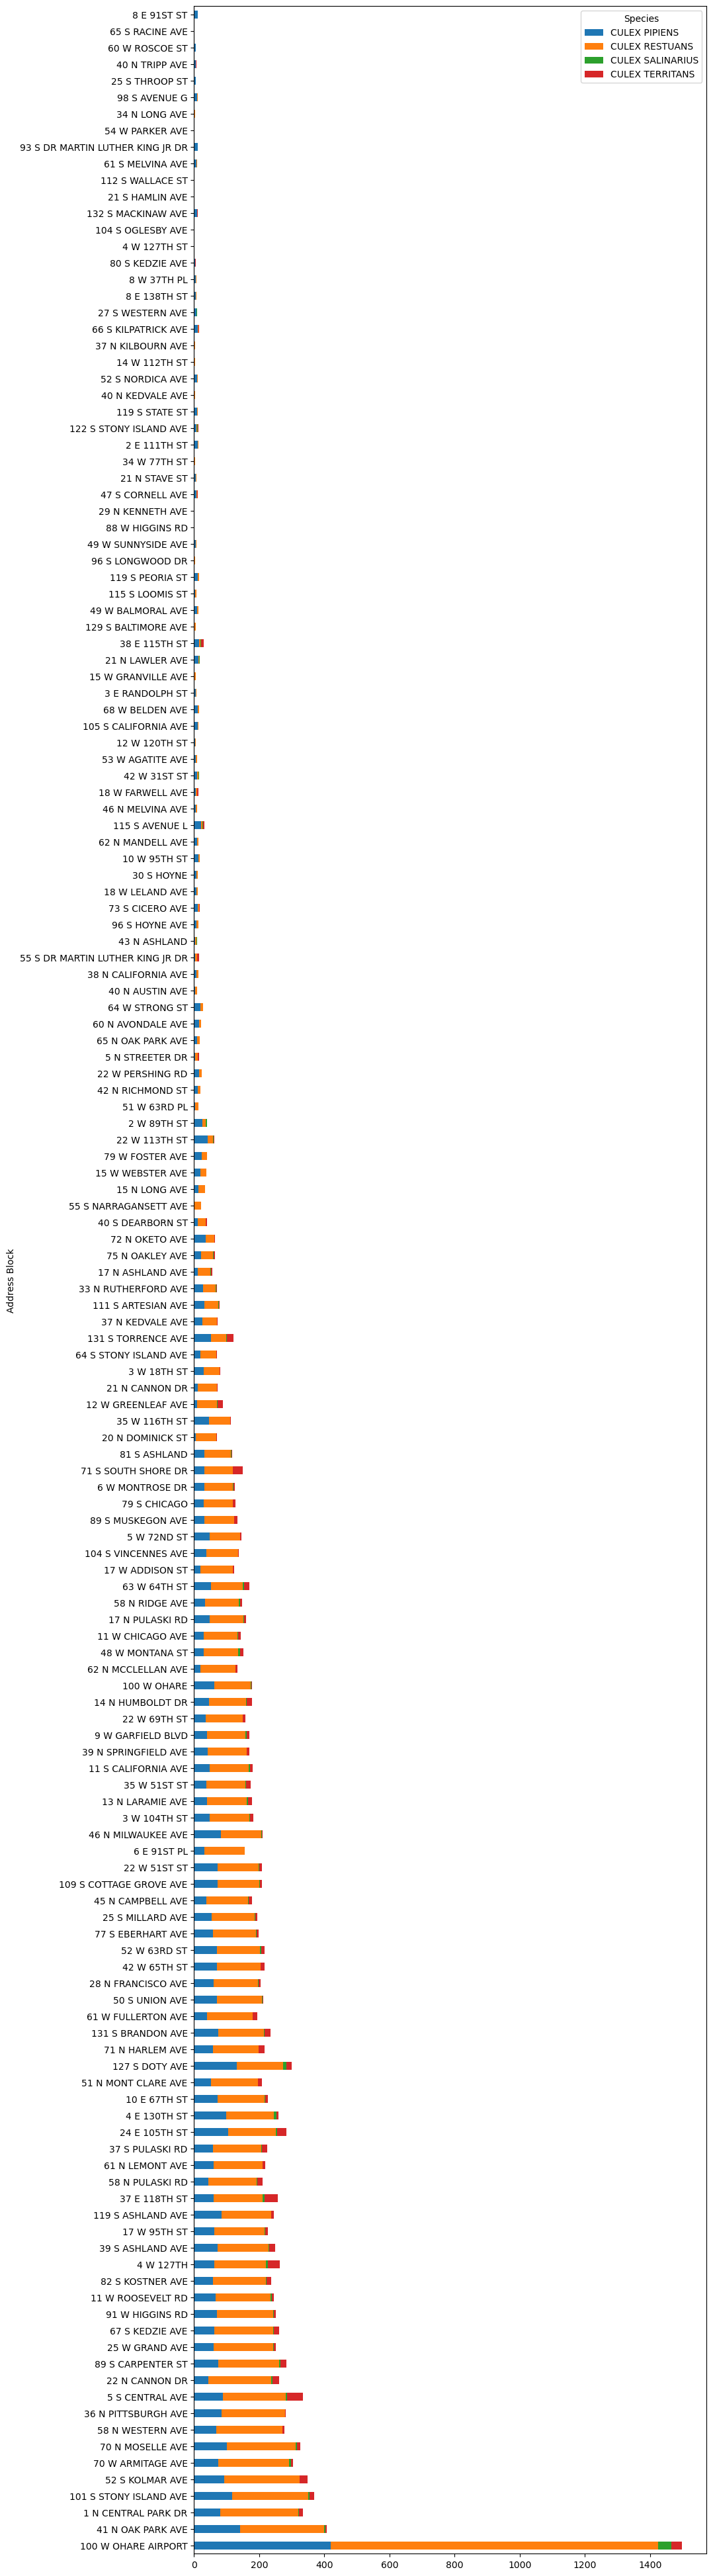

In [63]:
#Bar chart plot to show species available at each loaction. It is stacked.
plt.figure(figsize=(30, 300))
agg_df=wnv.groupby([ 'Address Block', 'Species'])['Address Block'].count()
agg_df.unstack().sort_values(by = 'CULEX RESTUANS', ascending=False ).plot(figsize=(10,50), kind = 'barh' ,stacked= True)

plt.show()

#### Observations:

<a id="3_3.1"></a>

We have know that CULEX RESTUANS is the most dominant species and is present in most of the locations. CULEX SALINARIUS and CULEX TERRITANS are not even available in fe locations.